# Email Similarity Classification

## Project Overview
This project explores text classification using the Naive Bayes algorithm to distinguish between different categories of emails. Specifically, it analyzes how well a classifier can differentiate between emails about baseball and emails about hockey.

## Objectives
- Load and preprocess email data from the `fetch_20newsgroups` dataset.
- Convert raw email text into numerical representations using `CountVectorizer`.
- Train a Multinomial Naive Bayes classifier on sports-related email categories.
- Evaluate model performance using accuracy, classification reports, and a confusion matrix.

## Dataset
We use the `fetch_20newsgroups` dataset, focusing on the following categories:
- `rec.sport.baseball`
- `rec.sport.hockey`

## Expected Outcome
By the end of this project, we will have a trained Naive Bayes model capable of classifying emails into baseball or hockey categories with measurable accuracy.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Fetch Training Data
train_emails = fetch_20newsgroups(categories=['rec.sport.baseball', 'rec.sport.hockey'],
                                  subset='train',
                                  shuffle=True,
                                  random_state=108)

# Fetch Test Data
test_emails = fetch_20newsgroups(categories=['rec.sport.baseball', 'rec.sport.hockey'],
                                 subset='test',
                                 shuffle=True,
                                 random_state=108)

# Exploratory Data Analysis
print("Categories:", train_emails.target_names)
print("Sample Email:", train_emails.data[5][:500], "...")  # Truncate for readability
print("Label (0=Baseball, 1=Hockey):", train_emails.target[5])

Categories: ['rec.sport.baseball', 'rec.sport.hockey']
Sample Email: From: smorris@venus.lerc.nasa.gov (Ron Morris )
Subject: Murray as GM  (was: Wings will win
Organization: NASA Lewis Research Center
Lines: 37
Distribution: world
NNTP-Posting-Host: venus.lerc.nasa.gov
News-Software: VAX/VMS VNEWS 1.41    

In article <1993Apr19.204348.8254@sol.UVic.CA>, gballent@hudson.UVic.CA writes...
> 
>In article 735249453@vela.acs.oakland.edu, ragraca@vela.acs.oakland.edu (Randy A. Graca) writes:
> 
>>are predicting).  Although I think Bryan Murray is probably the best GM ...
Label (0=Baseball, 1=Hockey): 1


In [3]:
# Text Vectorization
counter = CountVectorizer()
counter.fit(train_emails.data + test_emails.data)

# Transform Emails into Word Count Vectors
train_counts = counter.transform(train_emails.data)
test_counts = counter.transform(test_emails.data)

# Train Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(train_counts, train_emails.target)

# Evaluate Model
accuracy = classifier.score(test_counts, test_emails.target)
print("Model Accuracy:", accuracy)

# Generate Predictions
predictions = classifier.predict(test_counts)

# Classification Report
print("\nClassification Report:")
print(classification_report(test_emails.target, predictions, target_names=train_emails.target_names))

Model Accuracy: 0.9723618090452262

Classification Report:
                    precision    recall  f1-score   support

rec.sport.baseball       0.97      0.98      0.97       397
  rec.sport.hockey       0.98      0.97      0.97       399

          accuracy                           0.97       796
         macro avg       0.97      0.97      0.97       796
      weighted avg       0.97      0.97      0.97       796



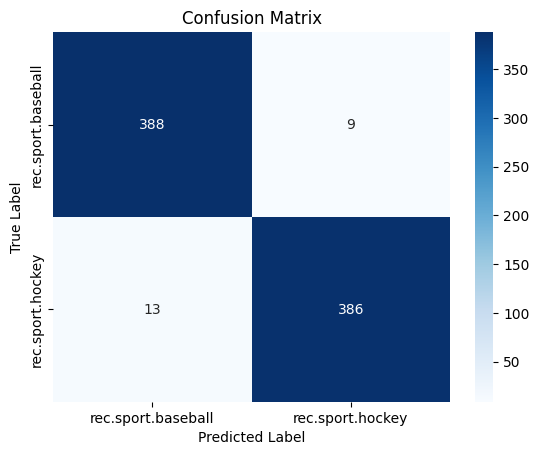

In [4]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_emails.target, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_emails.target_names, yticklabels=train_emails.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()